In this notebook you will practice the following:

- Scatterplots
- Line charts
- Bar charts
- Histograms
- Box plots
- Scaling plots

To learn about data visualization, we are going to use a modified version of [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset) which has information about movies

The dataset is located at `data/movies.csv`, and has the following fields

```
    belongs_to_collection (franquicia): Nombre de la franquicia a la cual pertenece la película.
    budget: Movie budget (in $).
    genre: Genre the movie belongs to.
    original_language: Language the movie was originally filmed in.
    production_company: Name of the production company.
    production_country: Country where the movie was produced.
    release_year: Year the movie was released.
    revenue: Movie ticket sales (in $).
    runtime: Movie duration (in minutes).
    title: Movie title.
    vote_average: Average rating in MovieLens.
    vote_count: Number of votes in MovieLens.
```

In [1]:
import pandas as pd

In [178]:
movies = pd.read_csv("data/movies.csv")

In [179]:
movies.shape

(756, 11)

In [180]:
movies.head()

,budget,genre,original_language,production_company,production_country,revenue,runtime,title,vote_average,vote_count,release_year
0,3500000.0,Comedy,en,New Line Cinema,United States of America,28215918.0,91.0,Friday,7.0,513.0,1995.0
1,12000000.0,Comedy,en,Universal Pictures,United States of America,41205099.0,92.0,Happy Gilmore,6.5,767.0,1996.0
2,31000000.0,Comedy,en,United Artists,United States of America,185260553.0,117.0,The Birdcage,6.7,303.0,1996.0
3,52000000.0,Drama,en,Imagine Entertainment,United States of America,355237933.0,140.0,Apollo 13,7.3,1637.0,1995.0
4,2000000.0,Comedy,en,Miramax Films,United States of America,1275000.0,83.0,Blue in the Face,6.8,28.0,1995.0


Import matplotlib, and the matplotlib inline magic.

In [3]:
# YOUR CODE HERE

Change the default chart size (one good set of values is [10, 10])

In [4]:
# YOUR CODE HERE

axis = plt.gca();

In [ ]:
assert matplotlib.rcParams["figure.figsize"] == [10.0, 10.0]

<hr>

### Note about the grading

Grading plots is difficult, we are using `plotchecker` to grade the plots with nbgrader. 
For `plotchecker` to work with nbgrader, we need to add on each cell, the line

`axis = plt.gca();`

**After the code required to do the plot**.

For example, if we want to plot a scatter plot showing the relationship between revenue and runtime we would do as follows:

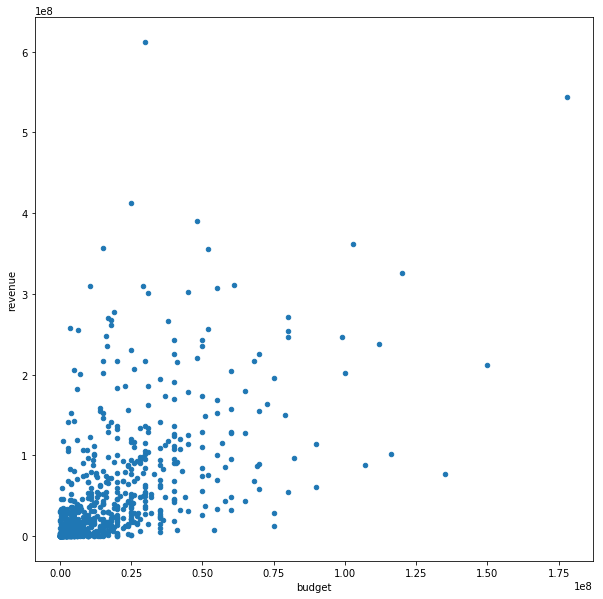

In [78]:
# code required to plot
movies[["budget", "revenue"]].plot.scatter(x="budget",y="revenue" )

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

<hr>

### How does the budget correlate with the revenue?

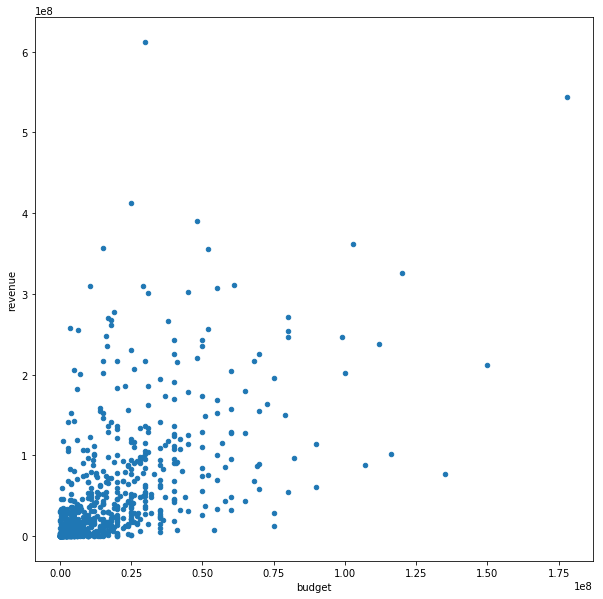

In [5]:
# YOUR CODE HERE

axis = plt.gca();

In [18]:
pc = ScatterPlotChecker(axis)
pc.assert_y_data_equal(movies[movies.revenue.notnull()].revenue)
pc.assert_x_data_equal(movies[movies.revenue.notnull()].budget)

### How does the average movie duration evolves over time? Set the plot title to "Average Movie Duration by year" 

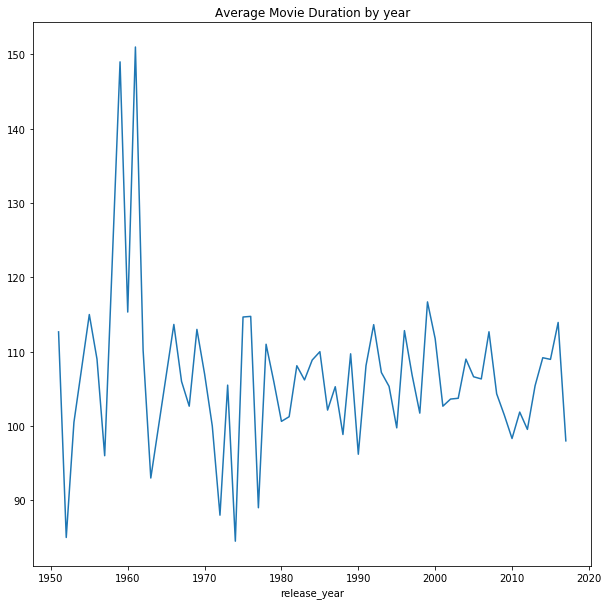

In [170]:
# YOUR CODE HERE

axis = plt.gca();

In [171]:
pc = LinePlotChecker(axis)
pc.assert_x_data_equal([sorted(movies[movies.runtime.notnull()].release_year.unique())])
pc.assert_y_data_equal([movies.groupby("release_year")["runtime"].mean()])
pc.assert_title_equal("Average Movie Duration by year")
print("Success!")

Success!


### How does the average revenue vary by movie language? Label the x-axis as "Average Revenue"

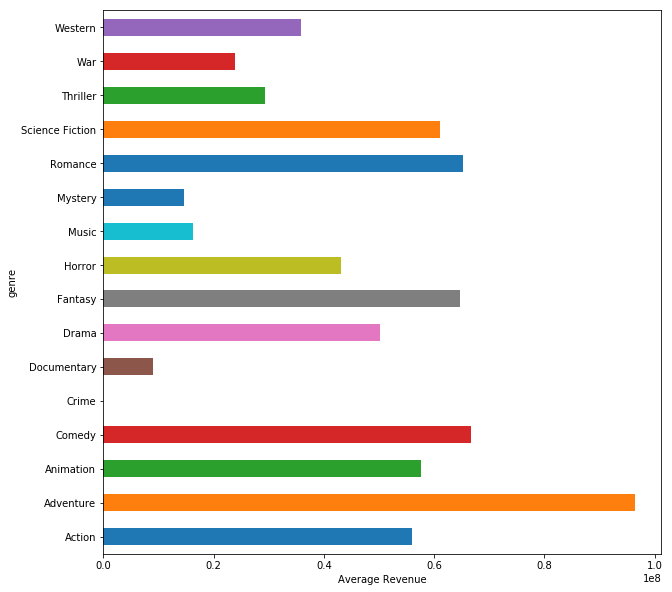

In [173]:
# YOUR CODE HERE

axis = plt.gca();

In [175]:
pc = BarPlotChecker(axis)
pc.assert_num_bars(len(movies.groupby("genre").groups))
pc.assert_widths_allclose(movies.groupby("genre")["revenue"].mean().values)
pc.assert_xlabel_equal("Average Revenue")
print("Success!")

Success!


### How is the variable vote_count distributed? (set the x axis limit to  < 2000)

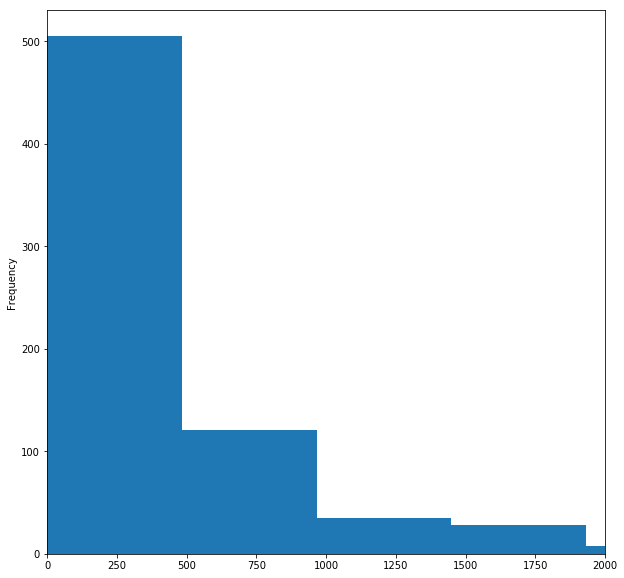

In [126]:
# YOUR CODE HERE

axis = plt.gca();

In [127]:
submission_pc = BarPlotChecker(axis)
answer_plot = movies.vote_count.plot.hist(xlim=(0, 2000))
plt.close()
answer_pc = BarPlotChecker(answer_plot)

np.testing.assert_allclose(answer_pc.heights, submission_pc.heights)
np.testing.assert_allclose(answer_pc.widths, submission_pc.widths)

print("Success!")

Success!


Make a plot that displays the revenue broken by movie language and that allows us to check if there are outliers.

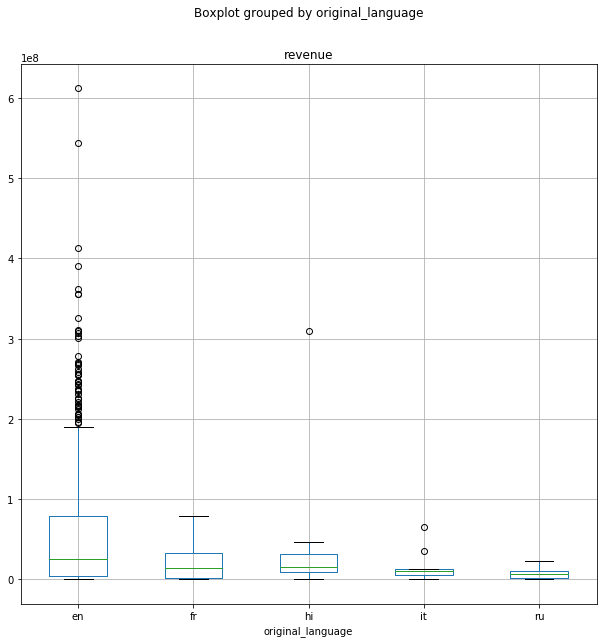

In [166]:
# YOUR CODE HERE

axis = plt.gca();

In [167]:
submission_pc = LinePlotChecker(axis)
evaluation_plot = movies.boxplot(column="revenue", by="original_language")
plt.close()
evaluation_pc = LinePlotChecker(answer_plot)

np.testing.assert_allclose(evaluation_pc.colors, submission_pc.colors)
np.testing.assert_allclose(evaluation_pc.yticks, submission_pc.yticks)
for submit_array, evaluation_array in zip(answer_pc.y_data, submission_pc.y_data):
    np.testing.assert_allclose(submit_array, evaluation_array)
for submit_array, evaluation_array in zip(answer_pc.x_data, submission_pc.x_data):
    np.testing.assert_allclose(submit_array, evaluation_array)

assert evaluation_pc.xticklabels == submission_pc.xticklabels

print("Success!")

Success!



# Ungraded Exercise
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of x in general?
* Are there any outlier in any of the fields?
* Which 2 charts better represent the underlying data?. Change their style to `bmh` and add titles to each chart explaining them 
